---

<a href="https://github.com/rraadd88/roux/blob/master/examples/roux_viz_line.ipynb"><img align="right" style="float:right;" src="https://img.shields.io/badge/-source-cccccc?style=flat-square"></a>

## Helper functions for scatter plots.

### Volcano plot
#### Demo data

In [1]:
import pandas as pd
data = pd.read_csv('https://git.io/volcano_data1.csv')
data['P']=data['P'].replace(data['P'].min(),0) # to show P=0 as a triangle 
data=pd.concat([
    data.query(expr='P>=0.001'),
    data.query(expr='P<0.001').assign(
        **{'categories':lambda df: pd.qcut(df['BP'],3, labels=['low','med','high'])}, # to annotate
        ),
    ],axis=0)
data.head(1)

,CHR,BP,P,SNP,ZSCORE,EFFECTSIZE,GENE,DISTANCE,categories
0,1,937641,0.335344,rs9697358,0.9634,-0.0946,ISG15,1068,NaN


#### Plot

/mnt/d/Documents/code/roux/roux/stat/transform.py:67: RuntimeWarning: divide by zero encountered in log10
  return -1*(np.log10(x))


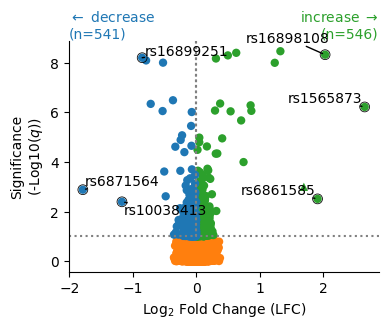

In [2]:
from roux.viz.scatter import plot_volcano
ax=plot_volcano(
    data,
    colx='EFFECTSIZE',
    coly='P',
    colindex='SNP',
    show_labels=3, # show top n 
    collabel='SNP',
    text_increase='n',
    text_decrease='n',
    # palette=sns.color_palette()[:3], # increase, decrease, ns
    )

#### With highlighted points

/mnt/d/Documents/code/roux/roux/stat/transform.py:67: RuntimeWarning: divide by zero encountered in log10
  return -1*(np.log10(x))


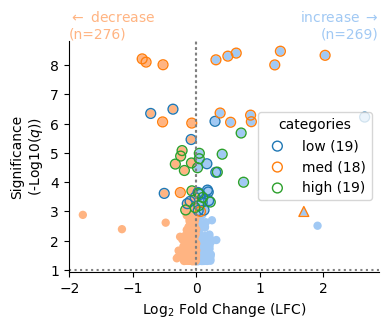

In [4]:
import seaborn as sns # required to set the palette of the outlines
ax=plot_volcano(
    data=data.query(expr="P<0.05"),
    colx='EFFECTSIZE',
    coly='P',
    colindex='SNP',
    # show_labels=3, # show top n 
    # collabel='SNP',
    show_outlines='categories',
    outline_colors=sns.color_palette()[:3],
    text_increase='n',
    text_decrease='n',
    palette=sns.color_palette('pastel')[:3], # increase, decrease, ns
    legend=True,
    )

### Documentation
[`roux.viz.scatter`](https://github.com/rraadd88/roux#module-roux.viz.scatter)